# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X = mnist['data']
y = mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [2]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [3]:
X[36000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

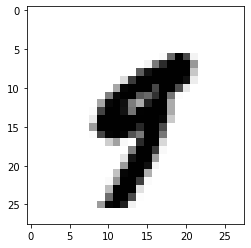

In [4]:

reshaped = X[36000].reshape(28,28)


import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(reshaped, cmap = plt.cm.binary, interpolation="nearest")

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [5]:
y[36000]

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [6]:
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [7]:
y_train_new = np.where(y_train == '5', True, False)
y_train_new
y_test_new = np.where(y_test == '5', True, False)
y_test_new

array([False, False, False, ..., False,  True, False])

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [8]:
from sklearn import linear_model
model = linear_model.LogisticRegression(solver='lbfgs', max_iter=2000)
model.fit(X_train, y_train_new)

/Users/vpavandijk/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Does the classifier predict correctly the 36000th digit we picked before?

In [9]:
model.predict(X[36000].reshape(1,-1))

array([False])

In [10]:
y_pred = model.predict(X_test)
y_pred

array([False, False, False, ..., False,  True, False])

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [11]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()
type(never_5_clf)

__main__.Never5Classifier

### Now lets fit and predict on the testing set using our never 5 Classifier

In [12]:
never_5_clf.fit(X_train, y_train_new)

never_5_pred = never_5_clf.predict(y_test_new)


### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [14]:
print(confusion_matrix(y_test_new, y_pred))
precision = precision_score(y_test_new, y_pred)
print(f'precision is: {precision}.')
recall = recall_score(y_test_new, y_pred)
print(f'recall is: {recall}.')
f1_score = f1_score(y_test_new, y_pred)
print(f'f1_score is: {f1_score}')


[[9029   79]
 [ 144  748]]
precision is: 0.9044740024183797.
recall is: 0.8385650224215246.
f1_score is: 0.8702734147760326


In [15]:
print(confusion_matrix(y_test_new, never_5_pred))
precision_5 = precision_score(y_test_new, never_5_pred)
print(f'precision is: {precision_5}.')
recall_5 = recall_score(y_test_new, never_5_pred)
print(f'recall is: {recall_5}.')
f1_score_5 = f1_score(y_test_new, never_5_pred)
print(f'f1_score is: {f1_score_5}.')


[[9108    0]
 [ 892    0]]
precision is: 0.0.
recall is: 0.0.


/Users/vpavandijk/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


TypeError: 'numpy.float64' object is not callable

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
# in the never 5 prediction the number of False Positives and Treu Positives is zero....
# That also gives a precision and recall of 0....


### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

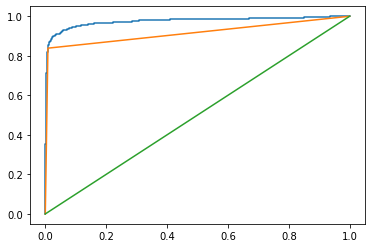

In [38]:
from sklearn.metrics import roc_curve

y_pred_proba = model.predict_proba(X_test)[::,1]

fpr1, tpr1, threshold1 = roc_curve(y_test_new, y_pred_proba)
fpr, tpr, threshold = roc_curve(y_test_new, y_pred)
fpr2, tpr2, threshold2 = roc_curve(y_test_new, never_5_pred)
plt.plot(fpr1,tpr1)
plt.plot(fpr,tpr)
plt.plot(fpr2,tpr2)

### Now find the roc_auc_score for each. 

In [39]:
from sklearn.metrics import roc_auc_score

auc1 = metrics.roc_auc_score(y_test_new, y_pred_proba)
print(auc1)
auc = metrics.roc_auc_score(y_test_new, y_pred)
print(auc)
auc2 = metrics.roc_auc_score(y_test_new, never_5_pred)
print(auc2)

0.9746917163445726
0.9149456644826113
0.5


### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
# The higher the metric, the more surface is there under the curve, which give a more reliable answer. 